# Getting Started

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Reading dataset

In [84]:
rides_df=pd.read_csv('cab_rides.csv')
weather_df=pd.read_csv('weather.csv')

In [85]:
rides_df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [86]:
weather_df.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [87]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [88]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


# cleaning the ride data

In [89]:
rides_df.isna().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

In [90]:
rides_df=rides_df.dropna(axis=0).reset_index(drop=True)

In [91]:
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


# cleaning weather data

In [92]:
weather_df.isna().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

In [93]:
weather_df=weather_df.fillna(0)

In [94]:
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
6272,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
6273,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54
6274,44.78,Theatre District,0.89,1000.70,0.0000,1543819974,0.96,1.54


In [95]:
rides_df['date']=pd.to_datetime(rides_df['time_stamp']/1000,unit='s')
weather_df['date']=pd.to_datetime(weather_df['time_stamp'],unit='s')

# joining weather data on rides data

In [96]:
rides_df['merged_date'] = rides_df['source'].astype('str') + ' - ' + rides_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + rides_df['date'].dt.hour.astype('str')
weather_df['merged_date'] = weather_df['location'].astype('str') + ' - ' + weather_df['date'].dt.strftime('%Y-%m-%d').astype('str') + ' - ' + weather_df['date'].dt.hour.astype('str')

In [97]:
weather_df.index = weather_df['merged_date']

In [98]:
df_joined = rides_df.join(weather_df, on = ['merged_date'], rsuffix ='_w')

In [99]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167730 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   distance          1167730 non-null  float64       
 1   cab_type          1167730 non-null  object        
 2   time_stamp        1167730 non-null  int64         
 3   destination       1167730 non-null  object        
 4   source            1167730 non-null  object        
 5   price             1167730 non-null  float64       
 6   surge_multiplier  1167730 non-null  float64       
 7   id                1167730 non-null  object        
 8   product_id        1167730 non-null  object        
 9   name              1167730 non-null  object        
 10  date              1167730 non-null  datetime64[ns]
 11  merged_date       1167730 non-null  object        
 12  temp              1164996 non-null  float64       
 13  location          1164996 non-null  object 

In [100]:
df_joined['id'].value_counts()

0d2e4fba-bac2-4f2e-b12f-0839f5efd800    15
d5ad7121-d629-41bc-bcd0-d238c9543ca0    15
5564739a-4b42-445b-a1c3-a4889cb788cb    15
2fcd529e-c2af-4984-a83f-4f25d91f4495    15
0ced8172-d0d3-4190-b8c5-b8af72749c3a    15
                                        ..
263a2304-a13a-487d-9db2-6e31470ab6cc     1
1ef7a856-eea0-4fa6-961f-3ac8f2d8c451     1
0a43c241-a478-4ae3-8051-263b7f28a3fd     1
015debf9-8503-41fa-991f-8e498cbdface     1
e7fdc087-fe86-40a5-a3c3-3b2a8badcbda     1
Name: id, Length: 637976, dtype: int64

In [101]:
df_joined[df_joined['id']=='865b44b9-4235-4e8e-b6fd-bc8373e95b63'].iloc[:,10:22]

,date,merged_date,temp,location,clouds,pressure,rain,time_stamp_w,humidity,wind,date_w,merged_date_w
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:45,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.82,2018-11-26 06:49:02,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.27,2018-11-26 06:15:45,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,40.49,Financial District,1.00,1014.18,0.0,1.543213e+09,0.91,1.22,2018-11-26 06:12:14,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,43.95,Financial District,1.00,1014.18,0.0,1.543213e+09,0.80,1.38,2018-11-26 06:24:04,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,43.97,Financial District,1.00,1014.18,0.0,1.543214e+09,0.81,1.45,2018-11-26 06:29:03,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,41.65,Financial District,0.98,1014.31,0.0,1.543215e+09,0.90,1.76,2018-11-26 06:50:30,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,40.50,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.25,2018-11-26 06:14:16,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,41.61,Financial District,0.98,1014.35,0.0,1.543215e+09,0.91,1.83,2018-11-26 06:49:43,Financial District - 2018-11-26 - 6
560855,2018-11-26 06:28:02.305999872,Financial District - 2018-11-26 - 6,40.51,Financial District,1.00,1014.18,0.0,1.543213e+09,0.92,1.28,2018-11-26 06:16:15,Financial District - 2018-11-26 - 6


In [102]:
id_group=pd.DataFrame(df_joined.groupby('id')['temp','clouds','pressure','rain','humidity','wind'].mean())
df_rides_weather=rides_df.join(id_group,on=['id'])

C:\Users\chand\AppData\Local\Temp\ipykernel_4740\1109667326.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  id_group=pd.DataFrame(df_joined.groupby('id')['temp','clouds','pressure','rain','humidity','wind'].mean())


In [103]:
##### creating the columns for month,hour and weekdays
df_rides_weather['Month']=df_rides_weather['date'].dt.month
df_rides_weather['Hour']=df_rides_weather['date'].dt.hour
df_rides_weather['Weekdays']=df_rides_weather['date'].dt.strftime('%A')


# Data Visualization

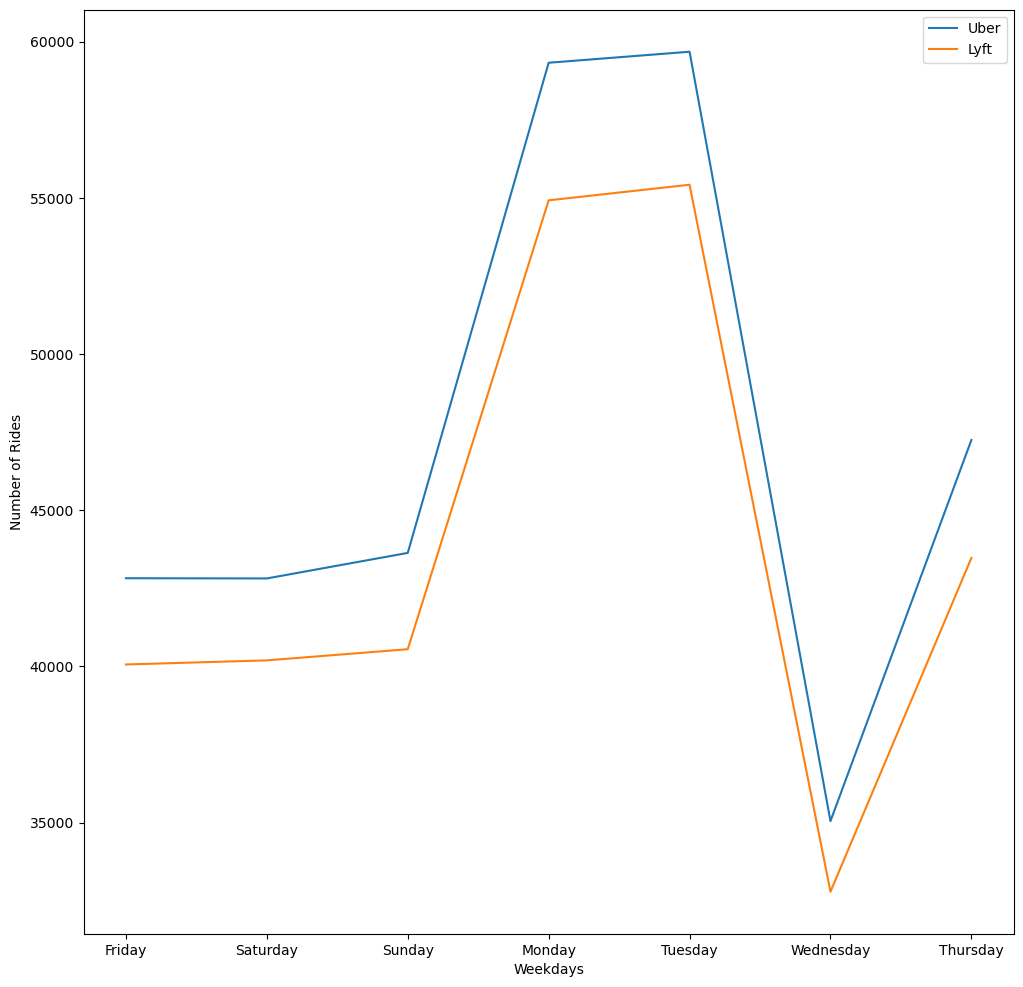

In [104]:
####The distribution of rides in weekdays 
import matplotlib.pyplot as plt
uber_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Uber']['Weekdays'].value_counts()
uber_day_count = uber_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])
lyft_day_count = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft']['Weekdays'].value_counts()
lyft_day_count = lyft_day_count.reindex(index = ['Friday','Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'])

fig , ax = plt.subplots(figsize = (12,12))
ax.plot(uber_day_count.index, uber_day_count, label = 'Uber')
ax.plot(lyft_day_count.index, lyft_day_count, label = 'Lyft')
ax.set(ylabel = 'Number of Rides', xlabel = 'Weekdays')
ax.legend()
plt.show()

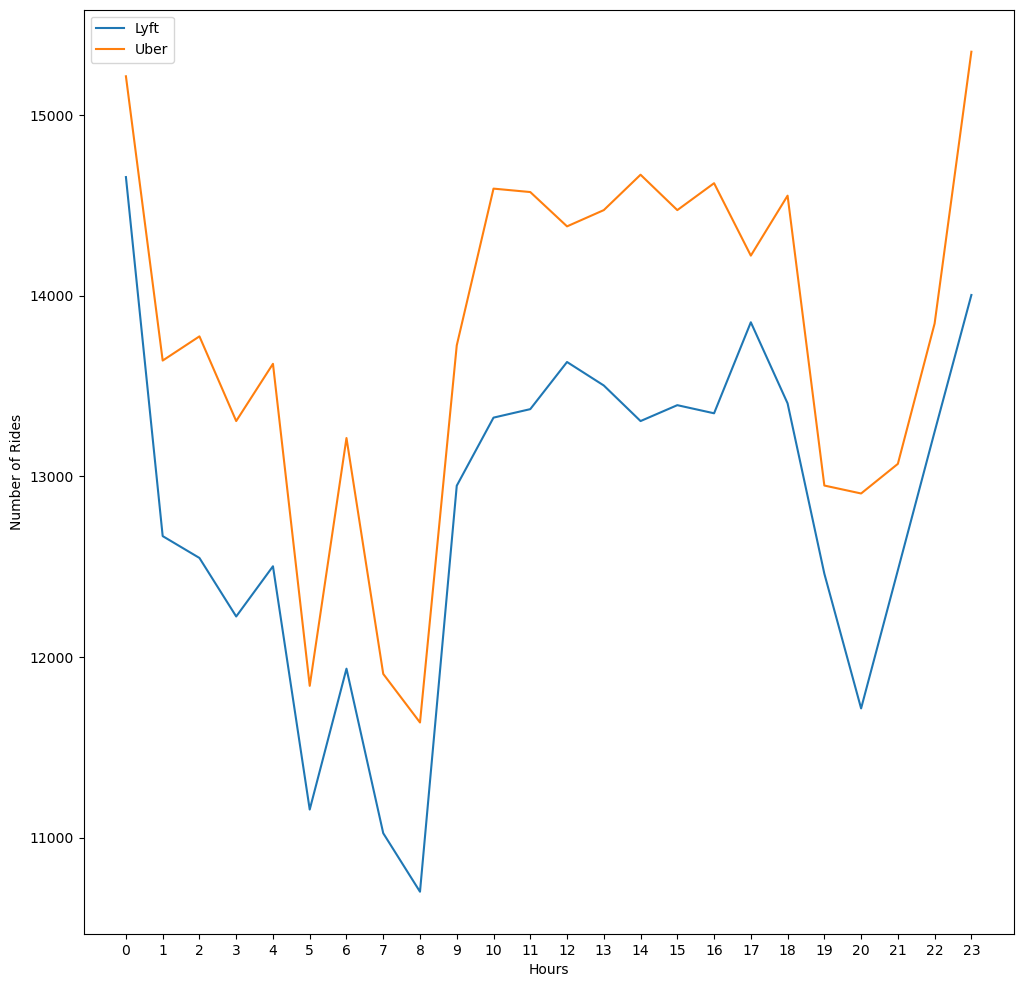

In [105]:
# The ride distribution in one day 
fig , ax = plt.subplots(figsize= (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('Hour').Hour.count(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('Hour').Hour.count().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('Hour').Hour.count(), label = 'Uber')
ax.legend()
ax.set(xlabel = 'Hours', ylabel = 'Number of Rides')
plt.xticks(range(0,24,1))
plt.show()


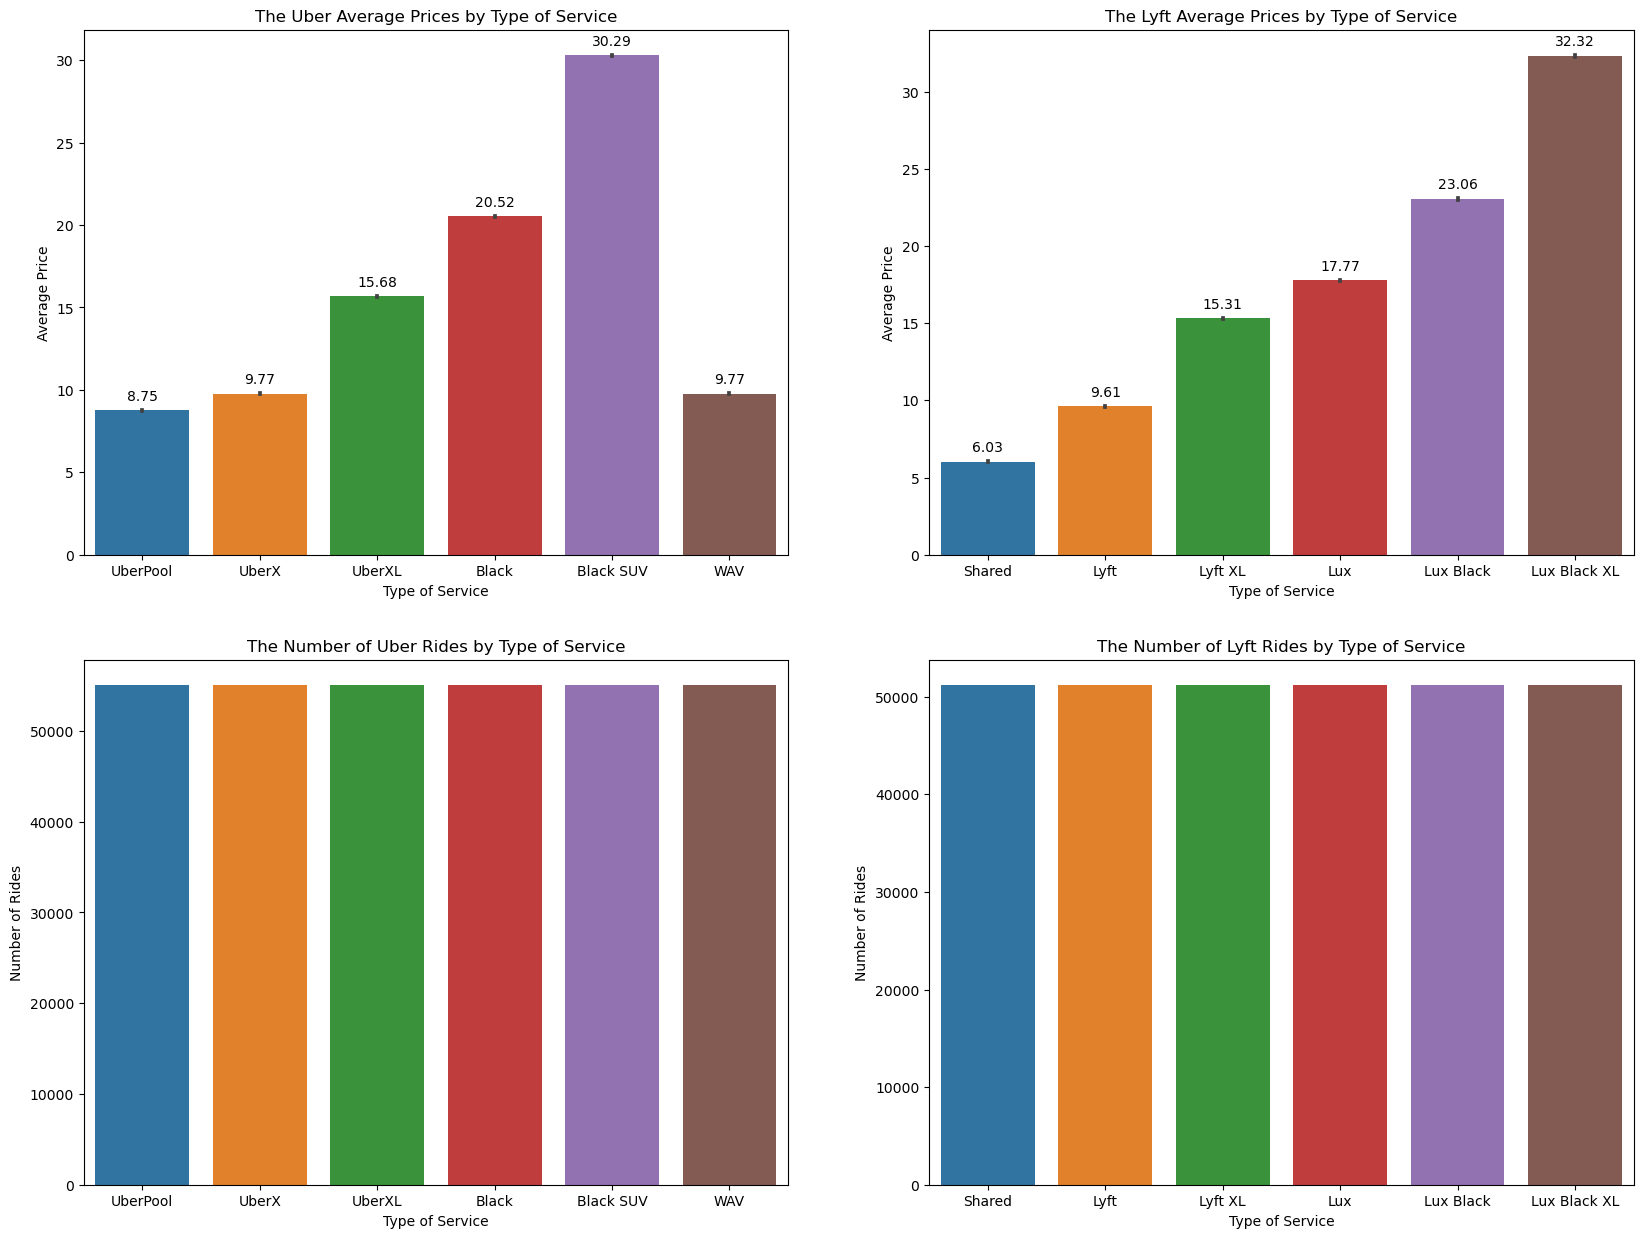

In [106]:
# The Average price of rides by type of service
import seaborn as sns

uber_order =[ 'UberPool', 'UberX', 'UberXL', 'Black','Black SUV','WAV' ]
lyft_order = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL']
fig, ax = plt.subplots(2,2, figsize = (20,15))
ax1 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].price , ax = ax[0,0], order = uber_order)
ax2 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].name, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].price , ax = ax[0,1], order = lyft_order)
ax3 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('name').name.count(), ax = ax[1,0] ,order = uber_order)
ax4 = sns.barplot(x = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count().index, y = df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('name').name.count(), ax = ax[1,1],order = lyft_order)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax2.set(xlabel = 'Type of Service', ylabel = 'Average Price')
ax3.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax4.set(xlabel = 'Type of Service', ylabel = 'Number of Rides')
ax1.set_title('The Uber Average Prices by Type of Service')
ax2.set_title('The Lyft Average Prices by Type of Service')
ax3.set_title('The Number of Uber Rides by Type of Service')
ax4.set_title('The Number of Lyft Rides by Type of Service')
plt.show()

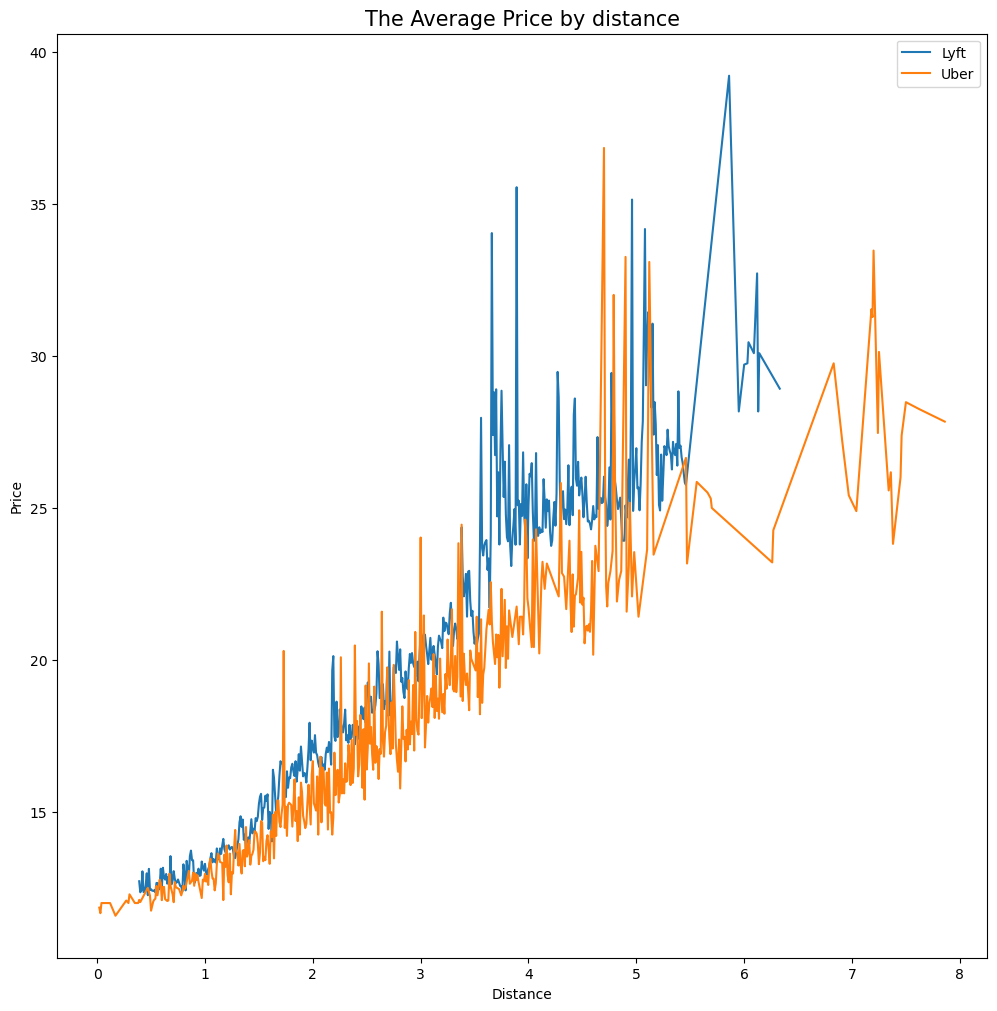

In [107]:
### The average price by distance
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df_rides_weather[df_rides_weather['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df_rides_weather[df_rides_weather['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()

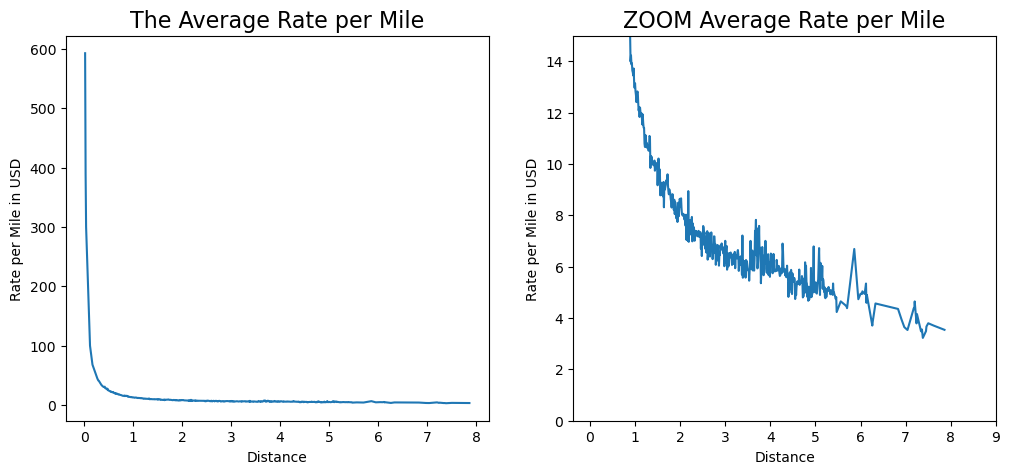

In [108]:
# the average rate per mile
df_rides_weather['rate_per_mile'] = round((df_rides_weather['price'] / df_rides_weather['distance'] ),2)
# The average rate per mile plot
fig, ax = plt.subplots(1,2,figsize = (12,5))
ax1 = sns.lineplot(x = df_rides_weather.groupby(['distance'])['rate_per_mile'].mean().index, y = df_rides_weather.groupby('distance')['rate_per_mile'].mean(), ax = ax[0])
ax2 = sns.lineplot(x = df_rides_weather.groupby(['distance'])['rate_per_mile'].mean().index, y = df_rides_weather.groupby('distance')['rate_per_mile'].mean(), ax = ax[1])
plt.xticks(range(0, 10,1))
ax1.set(xlabel = 'Distance', ylabel = 'Rate per Mile in USD')
ax2.set(xlabel = 'Distance', ylabel = 'Rate per Mile in USD', ylim = (0,15))
ax1.set_title('The Average Rate per Mile', fontsize = 16)
ax2.set_title('ZOOM Average Rate per Mile', fontsize = 16)
plt.show()

# Merging the Dataframes

In [109]:
rides_df = rides_df.drop('merged_date', axis=1)
rides_df = rides_df.drop('date', axis=1)
rides_df

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL
...,...,...,...,...,...,...,...,...,...,...
637971,1.00,Uber,1543708385534,North End,West End,9.5,1.0,353e6566-b272-479e-a9c6-98bd6cb23f25,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV
637972,1.00,Uber,1543708385534,North End,West End,13.0,1.0,616d3611-1820-450a-9845-a9ff304a4842,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL
637973,1.00,Uber,1543708385534,North End,West End,9.5,1.0,633a3fc3-1f86-4b9e-9d48-2b7132112341,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX
637974,1.00,Uber,1543708385534,North End,West End,27.0,1.0,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV


In [110]:
weather_df = weather_df.drop('merged_date', axis=1)
weather_df = weather_df.drop('date', axis=1)
weather_df

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
merged_date,,,,,,,,
Back Bay - 2018-12-16 - 23,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25
Beacon Hill - 2018-12-16 - 23,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32
Boston University - 2018-12-16 - 23,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07
Fenway - 2018-12-16 - 23,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09
Financial District - 2018-12-16 - 23,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49
...,...,...,...,...,...,...,...,...
North Station - 2018-12-03 - 6,44.72,North Station,0.89,1000.69,0.0000,1543819974,0.96,1.52
Northeastern University - 2018-12-03 - 6,44.85,Northeastern University,0.88,1000.71,0.0000,1543819974,0.96,1.54
South Station - 2018-12-03 - 6,44.82,South Station,0.89,1000.70,0.0000,1543819974,0.96,1.54


In [111]:
weather_df.groupby('location').mean()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
location,,,,,,,
Back Bay,39.082122,0.678432,1008.447820,0.007925,1.543857e+09,0.764073,6.778528
Beacon Hill,39.047285,0.677801,1008.448356,0.008297,1.543857e+09,0.765048,6.810325
Boston University,39.047744,0.679235,1008.459254,0.007738,1.543857e+09,0.763786,6.692180
Fenway,38.964379,0.679866,1008.453289,0.007343,1.543857e+09,0.767266,6.711721
Financial District,39.410822,0.676730,1008.435793,0.008563,1.543857e+09,0.754837,6.860019
Haymarket Square,39.067897,0.676711,1008.445239,0.008660,1.543857e+09,0.764837,6.843193
North End,39.090841,0.676730,1008.441912,0.008644,1.543857e+09,0.764054,6.853117
North Station,39.035315,0.676998,1008.442811,0.008649,1.543857e+09,0.765545,6.835755
Northeastern University,38.975086,0.678317,1008.444168,0.007358,1.543857e+09,0.767648,6.749426


In [112]:
avg_weather_df = weather_df.groupby('location').mean().reset_index(drop=False)
avg_weather_df = avg_weather_df.drop('time_stamp', axis=1)
avg_weather_df

,location,temp,clouds,pressure,rain,humidity,wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [113]:
source_weather_df = avg_weather_df.rename(
    columns={
        'location': 'source',
        'temp': 'source_temp',
        'clouds': 'source_clouds',
        'pressure': 'source_pressure',
        'rain': 'source_rain',
        'humidity': 'source_humidity',
        'wind': 'source_wind'
    }
)

source_weather_df

,source,source_temp,source_clouds,source_pressure,source_rain,source_humidity,source_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [114]:
destination_weather_df = avg_weather_df.rename(
    columns={
        'location': 'destination',
        'temp': 'destination_temp',
        'clouds': 'destination_clouds',
        'pressure': 'destination_pressure',
        'rain': 'destination_rain',
        'humidity': 'destination_humidity',
        'wind': 'destination_wind'
    }
)

destination_weather_df

,destination,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,Back Bay,39.082122,0.678432,1008.447820,0.007925,0.764073,6.778528
1,Beacon Hill,39.047285,0.677801,1008.448356,0.008297,0.765048,6.810325
2,Boston University,39.047744,0.679235,1008.459254,0.007738,0.763786,6.692180
3,Fenway,38.964379,0.679866,1008.453289,0.007343,0.767266,6.711721
4,Financial District,39.410822,0.676730,1008.435793,0.008563,0.754837,6.860019
5,Haymarket Square,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
6,North End,39.090841,0.676730,1008.441912,0.008644,0.764054,6.853117
7,North Station,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
8,Northeastern University,38.975086,0.678317,1008.444168,0.007358,0.767648,6.749426
9,South Station,39.394092,0.677495,1008.438031,0.008310,0.755468,6.848948


In [115]:
data = rides_df\
    .merge(source_weather_df, on='source')\
    .merge(destination_weather_df, on='destination')

data

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.008660,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,0.99,Lyft,1543218373178,Haymarket Square,Financial District,27.5,1.0,27e0c87b-2fe6-41e3-91c1-49119da998b0,lyft_luxsuv,Lux Black XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637972,0.99,Lyft,1543218373178,Haymarket Square,Financial District,5.0,1.0,4a8497f3-e93e-471d-bc6a-2230027a179d,lyft_line,Shared,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637973,0.99,Lyft,1543465761522,Haymarket Square,Financial District,16.5,1.0,5fb62b74-4383-4872-89f3-2021bf5943fd,lyft_lux,Lux Black,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193
637974,0.99,Lyft,1544762405152,Haymarket Square,Financial District,10.5,1.0,608d9d2b-c195-47eb-aff5-7d25448186a3,lyft_plus,Lyft XL,...,1008.435793,0.008563,0.754837,6.860019,39.067897,0.676711,1008.445239,0.008660,0.764837,6.843193


In [116]:
data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,source_pressure,source_rain,source_humidity,source_wind,destination_temp,destination_clouds,destination_pressure,destination_rain,destination_humidity,destination_wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,1008.445239,0.00866,0.764837,6.843193,39.035315,0.676998,1008.442811,0.008649,0.765545,6.835755


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 637975
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   distance              637976 non-null  float64
 1   cab_type              637976 non-null  object 
 2   time_stamp            637976 non-null  int64  
 3   destination           637976 non-null  object 
 4   source                637976 non-null  object 
 5   price                 637976 non-null  float64
 6   surge_multiplier      637976 non-null  float64
 7   id                    637976 non-null  object 
 8   product_id            637976 non-null  object 
 9   name                  637976 non-null  object 
 10  source_temp           637976 non-null  float64
 11  source_clouds         637976 non-null  float64
 12  source_pressure       637976 non-null  float64
 13  source_rain           637976 non-null  float64
 14  source_humidity       637976 non-null  float64
 15  

#### Observing Target, Numerical And Categorical Columns

In [118]:
cat=data.dtypes[data.dtypes=='O'].index.values
cat

array(['cab_type', 'destination', 'source', 'id', 'product_id', 'name'],
      dtype=object)

In [119]:
from collections import Counter as c 
for i in cat:
    print("Column :",i)
    print('count of classes : ',data[i].nunique())
    print(c(data[i]))
    print('*'*120)

Column : cab_type
count of classes :  2
Counter({'Uber': 330568, 'Lyft': 307408})
************************************************************************************************************************
Column : destination
count of classes :  12
Counter({'Financial District': 54192, 'Back Bay': 53190, 'Theatre District': 53189, 'Boston University': 53171, 'Haymarket Square': 53171, 'Fenway': 53166, 'Northeastern University': 53165, 'North End': 53164, 'South Station': 53159, 'West End': 52992, 'Beacon Hill': 52840, 'North Station': 52577})
************************************************************************************************************************
Column : source
count of classes :  12
Counter({'Financial District': 54197, 'Back Bay': 53201, 'Theatre District': 53201, 'Boston University': 53172, 'North End': 53171, 'Fenway': 53166, 'Northeastern University': 53164, 'South Station': 53160, 'Haymarket Square': 53147, 'West End': 52980, 'Beacon Hill': 52841, 'North Station': 5

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [120]:
data.dtypes[data.dtypes!='O'].index.values

array(['distance', 'time_stamp', 'price', 'surge_multiplier',
       'source_temp', 'source_clouds', 'source_pressure', 'source_rain',
       'source_humidity', 'source_wind', 'destination_temp',
       'destination_clouds', 'destination_pressure', 'destination_rain',
       'destination_humidity', 'destination_wind'], dtype=object)

In [121]:
data.isnull().any()

distance                False
cab_type                False
time_stamp              False
destination             False
source                  False
price                   False
surge_multiplier        False
id                      False
product_id              False
name                    False
source_temp             False
source_clouds           False
source_pressure         False
source_rain             False
source_humidity         False
source_wind             False
destination_temp        False
destination_clouds      False
destination_pressure    False
destination_rain        False
destination_humidity    False
destination_wind        False
dtype: bool

In [122]:
data.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price                   0
surge_multiplier        0
id                      0
product_id              0
name                    0
source_temp             0
source_clouds           0
source_pressure         0
source_rain             0
source_humidity         0
source_wind             0
destination_temp        0
destination_clouds      0
destination_pressure    0
destination_rain        0
destination_humidity    0
destination_wind        0
dtype: int64

# Label Encoding

In [ ]:
data1=data.copy() 
x='*'
for i in cat:
    print("LABEL ENCODING OF:",i)
    LE = LabelEncoder()
    print(c(data[i])) 
    data[i] = LE.fit_transform(data[i]) 
    print(c(data[i])) 
    print(x*100)

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
del data['data']

In [ ]:
data.info()

In [ ]:
x = data.drop(['price','distance','time_stamp','surge_multiplier','id','source_temp','source_clouds','source_pressure','source_rain','source_humidity','source_wind','destination_temp','destination_clouds','destination_pressure','destination_rain','destination_humidity','destination_wind'],axis=1) 
x=pd.DataFrame(x)
y = data['price'] 
y=pd.DataFrame(y)

In [ ]:
x.head()

In [ ]:
y.head()

# Split The Dataset Into Train Set And Test Set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)


# Building the model with the Random Forest Regressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand=RandomForestRegressor(n_estimators=20,random_state=52,n_jobs=-1,max_depth=4)
rand.fit(x_train,y_train)

In [ ]:
ypred=rand.predict(x_test)
print(ypred)

# Model Evaluation

In [ ]:
rand.score(x_train,y_train)

# Saving The Model

In [127]:
import pickle
pickle.dump(rand, open("model.pkl", "wb"))